### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.

In [30]:
data = pd.read_csv('data/coupons.csv')

In [31]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [32]:
# Investigate the data
data.info()
#Total rows: 12684
#Total columns: 26

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [33]:
# Verify all missing values
print(data.isnull().sum())
# null values in car: 12576 (almost entire column)
# null values in Bar: 107
# null values in CoffeeHouse: 217
# null values in CarryAway: 151
# null values in RestaurantLessThan20: 130
# null values in Restaurant20To50: 189

# Verify duplicated values
print(data.duplicated().sum())
# 74 duplicate rows found


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64
74


In [34]:
# summary of data
display(data.describe(include='all'))

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684,12684,12684,12684.000000,12684,12684,12684,12684,12684,12684,...,12467,12533,12554,12495,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
unique,3,4,3,NaN,5,5,2,2,8,5,...,5,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN
top,No Urgent Place,Alone,Sunny,NaN,6PM,Coffee House,1d,Female,21,Married partner,...,less1,1~3,1~3,less1,NaN,NaN,NaN,NaN,NaN,NaN
freq,6283,7305,10069,NaN,3230,3996,7091,6511,2653,5100,...,3385,4672,5376,6077,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,63.301798,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,NaN,NaN,NaN,19.154486,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000


3. Decide what to do about your missing data -- drop, replace, other...

In [35]:
# Drop entire column car (almost entire column values are missing)
data.drop(columns=['car'], inplace=True)

# Verify the values for columns Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50
columns_with_null = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
for column in columns_with_null:
    print(column)
    print(data[column].unique())


Bar
['never' 'less1' '1~3' 'gt8' nan '4~8']
CoffeeHouse
['never' 'less1' '4~8' '1~3' 'gt8' nan]
CarryAway
[nan '4~8' '1~3' 'gt8' 'less1' 'never']
RestaurantLessThan20
['4~8' '1~3' 'less1' 'gt8' nan 'never']
Restaurant20To50
['1~3' 'less1' 'never' 'gt8' '4~8' nan]


In [36]:
# Fill missing column values with most frequent values
for column in columns_with_null:
    data[column].fillna(data[column].mode()[0], inplace=True)
    
# Verify the missing values after null
print(data.isnull().sum())

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


4. What proportion of the total observations chose to accept the coupon?

In [37]:
# Total number of entries
total = len(data)

# Accepted coupons (where 1 = accepted)
accepted = data['Y'].value_counts()[1].sum()

# Proportion of accepted
proportion_accepted = accepted / total

# Answer check
print("Proportion of the total observations chose to accept the coupons:", proportion_accepted)

Proportion of the total observations chose to accept the coupons: 0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

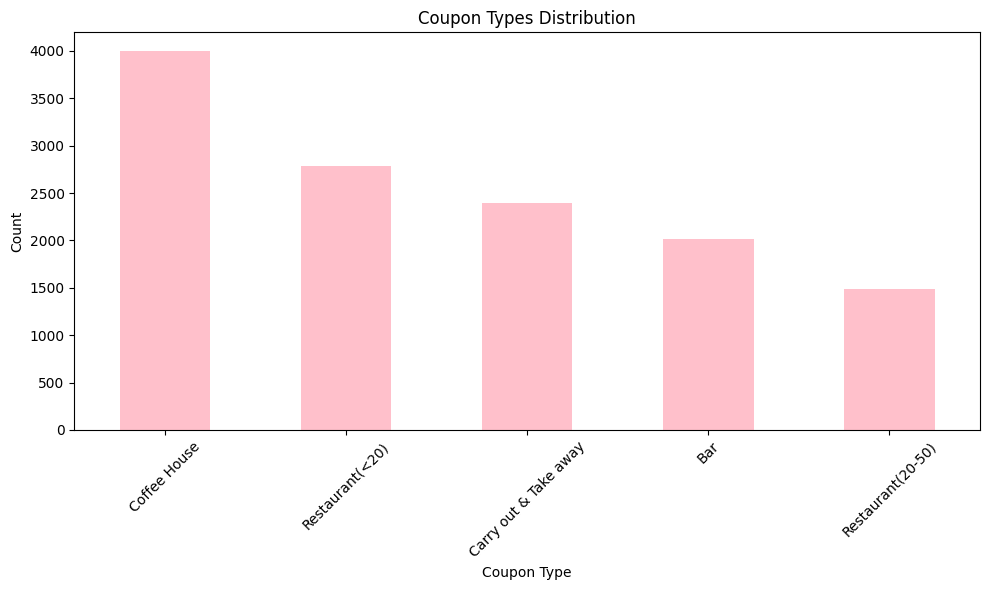

In [38]:
coupon_counts = data['coupon'].value_counts()

# Create a bar Plot
coupon_counts.plot(kind='bar', figsize=(10, 6), color='pink', title='Coupon Types Distribution')

# Label axes
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

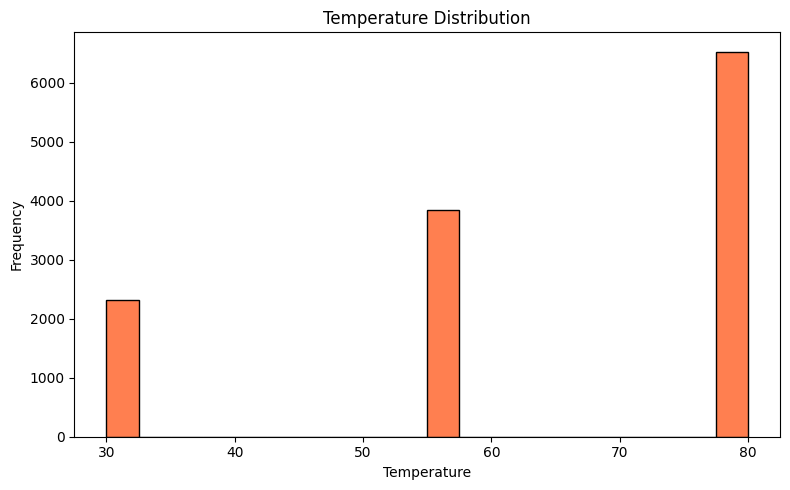

In [39]:
# Create a histogram
data['temperature'].plot(kind='hist', bins=20, figsize=(8, 5), color='coral', edgecolor='black', title='Temperature Distribution')

# Label axes
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons. 

1. Create a new `DataFrame` that contains just the bar coupons.

In [40]:
# Create a new DataFrame (using bar coupon query)
bar_coupons_data = data.query("coupon == 'Bar'")

# Answer check
bar_coupons_data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?

In [41]:
# Total number of Bar coupon entries
total_bar = len(bar_coupons_data)

# Accepted bar coupons (where 1 = accepted)
accepted_bar = bar_coupons_data['Y'].value_counts()[1].sum()

# Calculate the proportion
proportion_bar_accepted = accepted_bar / total_bar

# Answer check
print("Proportion of Bar coupons were accepted:", proportion_bar_accepted)

Proportion of Bar coupons were accepted: 0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

In [42]:
# People who went to bars <=3 times
group_fewer_times = bar_coupons_data.query("Bar == 'never' or Bar == 'less1' or Bar == '1~3'")

# People who went to bars >3 bar times
group_more_times = bar_coupons_data.query("Bar == 'gt8' or Bar == '4~8'")

# Calculate acceptance rates
rate_fewer_times = group_fewer_times['Y'].mean()
rate_more_times = group_more_times['Y'].mean()

# Answer check
print(f"Acceptance rate for those who went to bar <=3 times: {rate_fewer_times:.2%}")
print(f"Acceptance rate for those who went to bar >3 bar times: {rate_more_times:.2%}")

Acceptance rate for those who went to bar <=3 times: 37.07%
Acceptance rate for those who went to bar >3 bar times: 76.88%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?

In [43]:
# Drivers who go to a bar more than once a month and are over the age of 25 
group_a = bar_coupons_data.query("Bar in ['1~3', '4~8', 'gt8'] and age in ['26', '31', '36', '41', '46', '50plus']")

# All other cases
group_all_other = bar_coupons_data.drop(group_a.index)

# Calculate acceptance rates
rate_group_a = group_a['Y'].mean()
rate_group_all_other_a = group_all_other['Y'].mean()

# Answer check
print(f"Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: {rate_group_a:.2%}")
print(f"Acceptance rate for all other cases: {rate_group_all_other_a:.2%}")

Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: 69.52%
Acceptance rate for all other cases: 33.50%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

In [44]:
# Drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than Farming Fishing & Forestry
group_b = bar_coupons_data.query("Bar in ['1~3', '4~8', 'gt8'] and passanger in ['Friend(s)', 'Partner'] and occupation not in ['Farming Fishing & Forestry']")

# All other cases
group_all_other_b = bar_coupons_data.drop(group_b.index)

# Calculate acceptance rates
rate_group_b = group_b['Y'].mean()
rate_group_all_other_b = group_all_other_b['Y'].mean()

# Answer check
print(f"Acceptance rate for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than Farming Fishing and Forestry: {rate_group_b:.2%}")
print(f"Acceptance rate for all other cases: {rate_group_all_other_b:.2%}")

Acceptance rate for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than Farming Fishing and Forestry: 71.79%
Acceptance rate for all other cases: 37.71%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.

In [45]:
# Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed
group_c = bar_coupons_data.query("Bar in ['1~3', '4~8', 'gt8'] and passanger in ['Friend(s)', 'Partner'] and maritalStatus not in ['Widowed']")

# Drivers who go to bars more than once a month and are under the age of 30
group_d = bar_coupons_data.query("Bar in ['1~3', '4~8', 'gt8'] and age in ['21', '46', '26']")

# Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K
group_e = bar_coupons_data.query("RestaurantLessThan20 in ['4~8', 'gt8'] and income in ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']")

# Calculate acceptance rates
rate_group_c = group_c['Y'].mean()
rate_group_d = group_d['Y'].mean()
rate_group_e = group_e['Y'].mean()

# Answer check
print(f"Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: {rate_group_c:.2%}")
print(f"Acceptance rate for drivers who go to bars more than once a month and are under the age of 30: {rate_group_d:.2%}")
print(f"Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: {rate_group_e:.2%}")

Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: 71.79%
Acceptance rate for drivers who go to bars more than once a month and are under the age of 30: 73.22%
Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: 45.35%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

A few patterns have been observed based on acceptance rate computed. 

Bar coupons utilization seems highest among
1. Frequent Bar‑Goers (Acceptance rate for those who went to bar >3 bar times: 76.88%)
2. Younger adults (Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: 69.52%)
3. Rides without child (Acceptance rate for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than Farming Fishing and Forestry: 71.79%)
4. People who are not widowed (Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: 71.79%)
5. Income more than 50k (Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: 45.35%)

Hypothesis:
Drivers who accept bar coupons tend to be frequent bar-goers, younger adults, who travel without kids, aren’t widowed, and with sufficient disposable income. It suggests that younger, social, convenience‑driven, child-free adults are most responsive to a bar coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

1. Create a new `DataFrame` that contains just the Coffee House coupons.

In [46]:
# Query CoffeeHouse coupons
coffee_house_coupons_data = data.query("coupon == 'Coffee House'")

# Answer check
coffee_house_coupons_data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0


2. What is the acceptance rate of Coffee House coupons?

In [47]:
# Calculate the acceptance rate of coffee house coupons
coffee_house_coupons_rate = coffee_house_coupons_data['Y'].mean()
print(f"Overall CoffeeHouse acceptance: {coffee_house_coupons_rate:.2%}")

Overall CoffeeHouse acceptance: 49.92%


3. What is the acceptance rate by passenger?

In [48]:
# Calculate the acceptance rate by passenger
accept_by_passenger = coffee_house_coupons_data.groupby('passanger')['Y'].mean().sort_values()
print(accept_by_passenger)

passanger
Alone        0.437943
Kid(s)       0.483092
Partner      0.570492
Friend(s)    0.596906
Name: Y, dtype: float64


4. What is the acceptance rate by weather?

In [49]:
# Calculate the acceptance rate by weather
accept_by_weather = coffee_house_coupons_data.groupby('weather')['Y'].mean().sort_values()
print(accept_by_weather)

weather
Snowy    0.432343
Sunny    0.503605
Rainy    0.522124
Name: Y, dtype: float64


In [50]:
# Calculate the acceptance rate by destination
accept_by_destination = coffee_house_coupons_data.groupby('destination')['Y'].mean().sort_values()
print(accept_by_destination)

destination
Home               0.362069
Work               0.445783
No Urgent Place    0.580974
Name: Y, dtype: float64


 People are more likely to redeem a coffee coupon when 
 1. riding with friends or a partner and least likely when alone (based on acceptance rate by passenger)
 2. in rainy days (based on acceptance rate by weather)
 3. on leasure trips (based on rate by destination)
 
Hypothesis: Coffee House coupons resonate most with leisurely, social outings, particularly in rainy conditions. Drivers traveling with friends/partners who are not in rush to destination tend to redeem Coffee House coupons most.